In [58]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import RectBivariateSpline
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, rotate

In [60]:
image = shepp_logan_phantom()
#image = np.ones([100,100])
# Resize Image
diag = len(np.diag(image)//2)
image = np.pad(image, pad_width=diag+10)

In [61]:
_ = np.linspace(-1, 1, image.shape[0])
xv, yv = np.meshgrid(_,_)
image[(xv-0.1)**2+(yv-0.2)**2<0.01] = 2

# Create a rotated image
image_rot = rotate(image, 45)

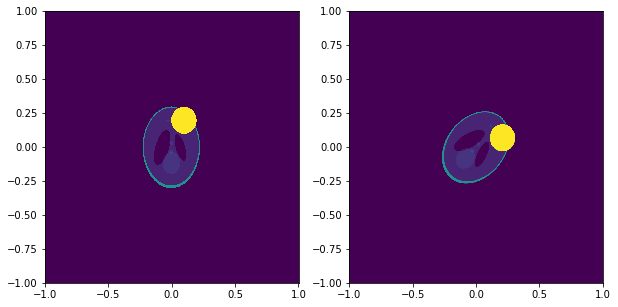

In [62]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].pcolor(xv,yv,image, shading='auto')
ax[1].pcolor(xv,yv,image_rot, shading='auto')
plt.show()

In [64]:
thetas = np.arange(0,180,5) * np.pi/180
rs = _
dtheta = np.diff(thetas)[0]
dr = np.diff(rs)[0]
rotations = np.array([rotate(image, theta*180/np.pi) for theta in thetas])

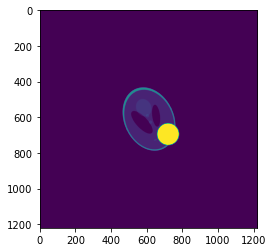

In [65]:
plt.imshow(rotations[5])

In [66]:
p = np.array([rotation.sum(axis=0)*dr for rotation in rotations]).T

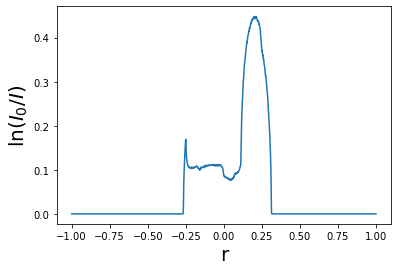

In [67]:
plt.plot(rs, p[:,9])
plt.xlabel('r', fontsize=20)
plt.ylabel('$\ln(I_0/I)$', fontsize=20)
plt.show()

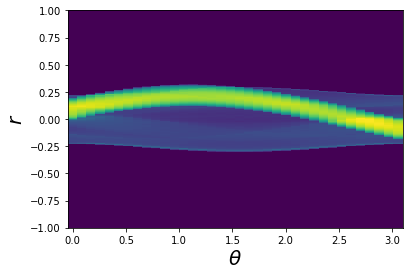

In [68]:
plt.pcolor(thetas, rs, p, shading='auto')
plt.xlabel(r'$\theta$', fontsize=20)
plt.ylabel('$r$', fontsize=20)
plt.show()

In [69]:
p_interp = RectBivariateSpline(rs, thetas, p)

In [70]:
def get_fBP(x,y):
    return p_interp(x*np.cos(thetas)+y*np.sin(thetas), thetas, grid=False).sum() * dtheta

fBP = np.vectorize(get_fBP)(xv,yv)

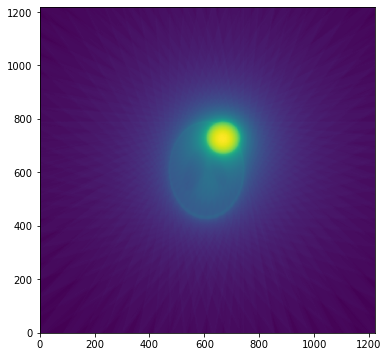

In [71]:
plt.figure(figsize=(6,6))
plt.pcolor(fBP)
plt.show()

In [72]:
from scipy.fft import fft, ifft

In [73]:
P = fft(p, axis=0)
nu = np.fft.fftfreq(P.shape[0], d=np.diff(rs)[0])

In [74]:
P.T.shape

(36, 1220)

In [75]:
nu.shape

(1220,)

In [76]:
integrand = P.T * np.abs(nu)
integrand = integrand.T
p_p = np.real(ifft(integrand, axis=0))

In [77]:
p_p_interp = RectBivariateSpline(rs, thetas, p_p)

In [78]:
def get_f(x,y):
    return p_p_interp(x*np.cos(thetas)+y*np.sin(thetas), thetas, grid=False).sum() * dtheta

f = np.vectorize(get_f)(xv,yv)

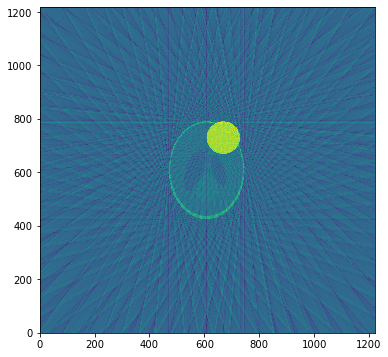

In [79]:
plt.figure(figsize=(6,6))
plt.pcolor(f)
plt.show()

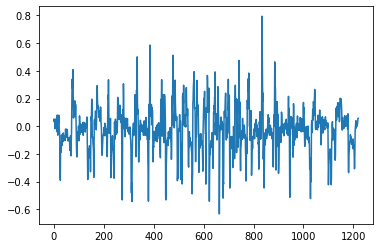

In [80]:
plt.plot(f[110])

In [28]:
from skimage.transform import radon, iradon

In [29]:
theta = np.arange(0., 180., 5)
sinogram = radon(image, theta=theta)

C:\Users\RONAN\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coords = np.array(np.ogrid[:image.shape[0], :image.shape[1]])


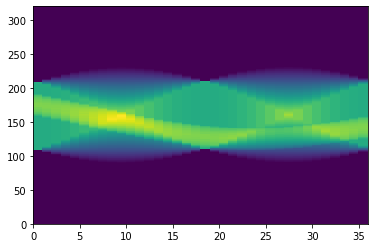

In [33]:
plt.pcolor(sinogram)

In [34]:
reconstruction_img = iradon(sinogram, theta=theta, filter_name='ramp')

TypeError: iradon() got an unexpected keyword argument 'filter_name'